<a href="https://colab.research.google.com/github/larissacybyk/machine-learning/blob/main/jdj9ng_assignment_4_ann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 4: Benchmarking Neural Nets with the XOR Problem



### CS 4774 Machine Learning - Department of Computer Science - University of Virginia
In this assignment, you will implement your own neural networks to classify non-linear data from the XOR dataset. For references, you may refer to my [lecture 13](https://docs.google.com/presentation/d/1otQfmMomWctLZKI3hHKAA4lLkbXFtagLaQov8gNh4LI/edit?usp=sharing) and [Colab Notebook 10](https://colab.research.google.com/drive/1x5biI3dP5YvvDEI0wapJcSgQNnATDzNe) if you need additional sample codes to help with your assignment. For deliverables, you must write code in Python/Tensorflow and submit **this** Jupyter Notebook file (.ipynb) to earn a total of 100 pts. Note that you must save your Notebook filename under this format: **yourUvaUserId_assignment_4_ann.ipynb**.



In [2]:
# You might want to use the following packages
import sklearn
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

import numpy as np
np.random.seed(42)

import matplotlib.pyplot as plt

---
## 1. THE DATASET AND VISUALIZATION

We will use the non-linear toy data called the XOR dataset. You may use the code snippet below to generate the train/validate/test set. Feel free to change the number of samples, and noise level. To keep the ratio between the sets consistent, please do not change the test_size and random_state parameters.



(720, 2)
(200, 2)
(80, 2)


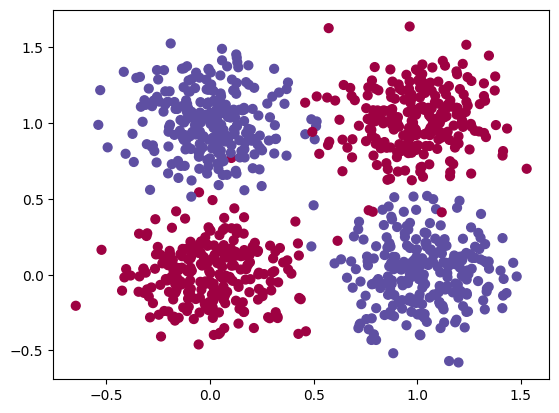

In [3]:
def make_xor(n_points):
    centers = np.array([[0,0],[0,1],[1,0],[1,1]])
    labels = np.array([0,1,1,0])
    data = np.array([]).reshape(-1,3)
    for center, label in zip(centers,labels):
        points = np.random.normal(loc=center,scale=0.2,size=(n_points//4,2))
        points_labels = np.hstack((points,label*np.ones(n_points//4).reshape((-1, 1))))
        data = np.vstack((data,points_labels))
    return (data[:,[0,1]],data[:,2])


X, y = make_xor(1000)
y=y.astype(np.int64)
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=49)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size= 0.1, random_state=49)
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)


---
## 2. TRAIN A SIMPLE ANN FOR CLASSIFICATION TASK (20 pts)

Use the standard libarary of Neural Net on the training data, and then test the classifier on the test data. You will create a simple ANN with 3 layers: an Input Layer, a Hidden Layer and an Output Layer. For each layer, you can specify the number of nodes appropriate for the XOR problem. Also, you have to make attempt to tune the network to improve the model in term on classification accuracy. You have to report the accuracy of the network on the validation set.

In [4]:
import tensorflow as tf
from tensorflow import keras

my_model = keras.Sequential()
# Your code here!



In [5]:
# for tuning
def build_model(optimizer="sgd", loss="binary_crossentropy"):
    my_model = keras.Sequential()
    my_model.add(keras.layers.Input(shape=(2,)))
    my_model.add(keras.layers.Dense(6, activation="tanh")) # tanh easier to train than sigmoid
    my_model.add(keras.layers.Dense(2, activation="softmax")) # for classification

    my_model.compile(loss=loss ,
              optimizer=optimizer,
              metrics=["accuracy"])

    return my_model

In [6]:
my_model = build_model()

In [7]:
from keras.utils import to_categorical
my_model.fit(X_train, to_categorical(y_train), batch_size = 32, epochs=100, verbose = 0)


In [8]:
# eval
loss, accuracy = my_model.evaluate(X_val, to_categorical(y_val))
print("loss:", loss)
print("accuracy:", accuracy)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7961 - loss: 0.6239  
loss: 0.6228629946708679
accuracy: 0.7875000238418579


In [9]:
# %pip install scikeras

In [10]:
from scikeras.wrappers import KerasClassifier
keras_class = KerasClassifier(build_model)

In [11]:
keras_class.fit(X_train, to_categorical(y_train), batch_size = 32, epochs=100, verbose = 0)


KerasClassifier(
	model=<function build_model at 0x0000028330ADFBE0>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=1
	class_weight=None
)

In [12]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "optimizer": ['sgd', 'adam'],
}

rnd_search_cv = RandomizedSearchCV(keras_class, param_distribs, n_iter=10, cv=3, verbose=2)
print(keras_class.get_params().keys())
rnd_search_cv.fit(X_train, to_categorical(y_train), epochs=100,
                  validation_data=(X_val, to_categorical(y_val)),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

dict_keys(['model', 'build_fn', 'warm_start', 'random_state', 'optimizer', 'loss', 'metrics', 'batch_size', 'validation_batch_size', 'verbose', 'callbacks', 'validation_split', 'shuffle', 'run_eagerly', 'epochs', 'class_weight'])
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Epoch 1/100


c:\Users\l3n3c\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4657 - loss: 0.7101 - val_accuracy: 0.6250 - val_loss: 0.7102
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5206 - loss: 0.7089 - val_accuracy: 0.6375 - val_loss: 0.7101
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6038 - loss: 0.7073 - val_accuracy: 0.6500 - val_loss: 0.7100
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6422 - loss: 0.7063 - val_accuracy: 0.6625 - val_loss: 0.7099
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6282 - loss: 0.7077 - val_accuracy: 0.6625 - val_loss: 0.7098
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6563 - loss: 0.7073 - val_accuracy: 0.7125 - val_loss: 0.7097
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7030 - loss: 0.7048 - val_accuracy: 0.7125 - val_loss: 0.7096
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7421 - loss: 0.7018 - val_accuracy: 0.7125 - val_loss: 0.

RandomizedSearchCV(cv=3,
                   estimator=KerasClassifier(model=<function build_model at 0x0000028330ADFBE0>),
                   param_distributions={'optimizer': ['sgd', 'adam']},
                   verbose=2)

In [13]:
# best estimator: optimizer="adam"

best_model = build_model(optimizer="adam")
best_model.fit(X_train, to_categorical(y_train), epochs=100,
                  validation_data=(X_val, to_categorical(y_val)),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])


Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6655 - loss: 0.6934 - val_accuracy: 0.5750 - val_loss: 0.7228
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6792 - loss: 0.6933 - val_accuracy: 0.5625 - val_loss: 0.7175
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6569 - loss: 0.6917 - val_accuracy: 0.5750 - val_loss: 0.7135
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6239 - loss: 0.6986 - val_accuracy: 0.5750 - val_loss: 0.7104
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6178 - loss: 0.6993 - val_accuracy: 0.5750 - val_loss: 0.7066
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6457 - loss: 0.6895 - val_accuracy: 0.5625 - val_loss: 0.7030
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6316 - loss: 0.6906 - val_accuracy: 0.5625 - val_loss: 0.7004
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6570 - loss: 0.6860 - val_accuracy: 0.5750 - v

In [14]:
loss, accuracy = best_model.evaluate(X_val, to_categorical(y_val))
# print("loss:", loss)
print("accuracy of model on validation set:", accuracy)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9672 - loss: 0.2202
accuracy of model on validation set: 0.949999988079071


- - -
## 3. IMPLEMENTING YOUR OWN SIMPLE NEURAL NETWORK (50 pts)

Now that you see how the standard library ANN performs on the XOR dataset, you will attempt to implement your own version of the neural network. To help you, a template has been created including the backpropagation. Essensially, you will get the backward gradients for free. However, please note that the backprop implementation assume usage of tanh activation for the hidden layer and softmax for the output layer. There are some subtasks which you need to implement in order to get the network to work properly.

In [32]:
from sklearn.base import BaseEstimator
from sklearn.preprocessing import OneHotEncoder

class MyNeuralNet(BaseEstimator):
    """Your implementation of a simple neural network"""

    def __init__ (self, n0, n1, n2, alpha=0.01):
        """
        @param: n0: Number of nodes in the input layer
        @param: n1: Number of nodes in the hidden layer
        @param: n2: Number of nodes in the output layer
        @param: alpha: The Learning Rate
        """

        # SUBTASK 1: Initialize the parameters to random values.
        np.random.seed(42)
        self.W1 = np.random.randn(n1, n0)
        self.b1 = np.random.randn(n1, 1)
        self.W2 = np.random.randn(n2, n1)
        self.b2 = np.random.randn(n2, 1)

        # Configure the learning rate
        self.alpha = alpha
        # One-hot encoder for labels
        self.encoder = OneHotEncoder(sparse_output=False)
    
    def softmax(self, Z2): 
        exp_vals = np.exp(Z2)
        exp_sum = np.sum(exp_vals, axis=1, keepdims=True)
        prob = exp_vals/exp_sum
        # print(prob)
        return prob
    
    def forward_pass(self, X):
        """
        Pass the signal forward through the layers.
        @param: X: feature
        @return: A1: saved value of the output of the hidden layer
        @return: A2: activated return value of the output layer.
        """
        # SUBTASK 2: Implement Forward propagation.
        # Note: that you must implement tanh activation for the hiden layer
        # and softmax for the output layer

        Z1 = np.dot(self.W1, X) + self.b1
        A1 = np.tanh(Z1) #hidden layer
        Z2 = np.dot(self.W2, A1) + self.b2
        A2 = self.softmax(Z2) #output layer - created softmax function above ^^

        return A1, A2


    def loss(self, X, y):
        """
        Evaluate the total loss on the dataset
        @param: X: features
        @param: y: labels
        @return: L: the loss value
        """


        # SUBTASK 3: Calculate the loss using Cross-Entropy
        # You will need to return the average loss on the data
        # Hint: Use A2 to calculate the loss
        A1, A2 = self.forward_pass(X)
        # Another Hint: First, you may want to convert the lable y into a one-hot vector
        Y = self.one_hot(y)
        L = - np.sum(Y*np.log(A2))/Y.shape[1] # x is discrete, use sum then AVG!

        return L

    def backward_pass(self, A1, A2, X, y):
        """
        @param: X: feature
        @param: y: label
        @param: A1: saved value of the output of the hidden layer
        @param: a2: activated return value of the output layer.

        @return: dW1: the loss gradient of W1
        @return: db1: the loss gradient of b1
        @return: dW2: the loss gradient of W2
        @return: db2: the loss gradient of b2
        """

        # You DO NOT CHANGE this function, ...
        # unless you are advanced and want to use different activation function for your forward pass
        # This is an elegant partial derivative of cross entropy with softmax
        # Ref document: https://deepnotes.io/softmax-crossentropy
        m   = y.shape[0]
        dZ2 = A2 - self.one_hot(y)
        dW2 = np.dot(dZ2, A1.T)/m
        db2 = np.sum(dZ2, axis=1, keepdims=True)/m
        dZ1 = np.multiply( np.dot( self.W2.T, dZ2), 1-np.power( A1, 2))
        dW1 = np.dot(dZ1, X.T)/m
        db1 = np.sum(dZ1, axis=1, keepdims=True)/m

        return dW1, db1, dW2, db2


    def fit(self, X, y , epochs, X_val, Y_val):
        """
        Learns parameters for the neural network and returns the model.

        @param: X: the training feature
        @param: y: the train label
        @param: epochs: Number of passes through the training data for gradient descent
        @param: X_val: the feature of validation set
        @param: y_val: the label of validation set
        """

        # Input checks: X and X_val needs to be in the form of n0 x m
        if (X.shape[0] > X.shape[1]): X = X.T
        if (X_val.shape[0] > X_val.shape[1]): X_val = X_val.T

        # Gradient descent
        for i in range(0, epochs):

            # SUBTASK 4: Compute the forward, backward, and gradient descent parameter update
            # Step 1: Forward pass
            A1, A2 = self.forward_pass(X)

            # Step 2: Backward pass
            dW1, db1, dW2, db2 = self.backward_pass(A1=A1, A2=A2, X=X, y=y)

            # Step 3: Gradient Descent subtract!!
            self.W1 -=  (dW1 * self.alpha)
            self.b1 -= (db1 * self.alpha)
            self.W2 -= (dW2 * self.alpha)
            self.b2 -= (db2 * self.alpha)

            # Print the loss and validation accuracy every 10 epochs.
            if i % 10 == 0:
                print("Epoch %i/%i - loss: %f - accuracy: %f - val_loss: %f - val_accuracy: %f"
                      %(i,epochs, self.loss(X, y), self.evaluate(X, y),
                        self.loss(X_val, y_val), self.evaluate(X_val,y_val)))

    def predict(self, X):
        """
        Predict label vector y
        """
        # check X for the form of n0 x m
        if (X.shape[0] > X.shape[1]): X = X.T

        # SUBTASK 5: Implement the prediction process.
        # Hint: It should include a forward pass, and then use the class with higher probability.
        A1, A2 = self.forward_pass(X)
        y_hat = np.argmax(A2, axis=0)
        return y_hat


    def evaluate(self, X, y):
        """
        Evaluate the accuracy of the model
        """
        m = y.shape[0]
        y_hat = self.predict(X)
        correct_y = (y_hat == y).astype(int)
        # print("pred", y_hat)
        # print("true", correct_y)
        return sum(correct_y)/m


    def one_hot(self, y):
        """
        Utility function: Convert a label vector to one-hot vector
        """
        Y = self.encoder.fit_transform(y.reshape(len(y),1))
        return Y.T # Transpose to get into same shape 1 x m


    def plot_decision_boundary(self, X, y):
        """
        Utility Function: Plot a decision boundary for visualization purpose.
        If you don't fully understand this function don't worry, it just generates the contour plot below.
        """
        # Set min and max values and give it some padding
        x_min, x_max = X[:,0].min() - .5, X[:,0].max() + .5
        y_min, y_max = X[:,1].min() - .5, X[:,1].max() + .5
        h = 0.01
        # Generate a grid of points with distance h between them
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        # Predict the function value for the whole gid
        data_grid= np.c_[xx.ravel(), yy.ravel()]
        Z = self.predict(data_grid)
        Z = Z.reshape(xx.shape)

        # Plot the contour and training examples
        plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1)
        plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Spectral)

In [33]:
my_nn = MyNeuralNet(2, 2, 2)
my_nn.fit(X_train, y_train, 100, X_val, y_val) # dont need to use to_categorical - one hot encoder in code

Epoch 0/100 - loss: 6.695204 - accuracy: 0.500000 - val_loss: 4.483082 - val_accuracy: 0.475000
Epoch 10/100 - loss: 6.701254 - accuracy: 0.502778 - val_loss: 4.484630 - val_accuracy: 0.475000
Epoch 20/100 - loss: 6.706618 - accuracy: 0.504167 - val_loss: 4.485675 - val_accuracy: 0.475000
Epoch 30/100 - loss: 6.711090 - accuracy: 0.504167 - val_loss: 4.486205 - val_accuracy: 0.487500
Epoch 40/100 - loss: 6.714564 - accuracy: 0.506944 - val_loss: 4.486213 - val_accuracy: 0.487500
Epoch 50/100 - loss: 6.717029 - accuracy: 0.508333 - val_loss: 4.485710 - val_accuracy: 0.487500
Epoch 60/100 - loss: 6.718536 - accuracy: 0.508333 - val_loss: 4.484724 - val_accuracy: 0.487500
Epoch 70/100 - loss: 6.719168 - accuracy: 0.508333 - val_loss: 4.483305 - val_accuracy: 0.487500
Epoch 80/100 - loss: 6.719025 - accuracy: 0.508333 - val_loss: 4.481507 - val_accuracy: 0.487500
Epoch 90/100 - loss: 6.718209 - accuracy: 0.508333 - val_loss: 4.479390 - val_accuracy: 0.487500


---
## 4. REFLECT ON THE COMPARISON BETWEEN YOUR IMPLEMENTATION TO THE STANDARD LIBRARY (30 pts)
Now that you have implemented your own Neural Net class, let's use it! Create at least 3 instances of your Neural Net class, each with a different number of nodes in the hiden layer, tune it with the appropriate learning rate and number of iteration. You will test their performance in the Xor dataset and report the test accuracy metrics for each instance of your neural network.

Based on the test accuracy, compare your models with the standard library version.

Epoch 0/100 - loss: 6.697687 - accuracy: 0.501389 - val_loss: 4.483747 - val_accuracy: 0.475000
Epoch 10/100 - loss: 6.717787 - accuracy: 0.508333 - val_loss: 4.485350 - val_accuracy: 0.487500
Epoch 20/100 - loss: 6.716144 - accuracy: 0.506944 - val_loss: 4.476050 - val_accuracy: 0.487500
Epoch 30/100 - loss: 6.702780 - accuracy: 0.506944 - val_loss: 4.461899 - val_accuracy: 0.487500
Epoch 40/100 - loss: 6.685539 - accuracy: 0.504167 - val_loss: 4.447560 - val_accuracy: 0.475000
Epoch 50/100 - loss: 6.668465 - accuracy: 0.504167 - val_loss: 4.434990 - val_accuracy: 0.475000
Epoch 60/100 - loss: 6.653365 - accuracy: 0.501389 - val_loss: 4.424713 - val_accuracy: 0.462500
Epoch 70/100 - loss: 6.640784 - accuracy: 0.495833 - val_loss: 4.416623 - val_accuracy: 0.462500
Epoch 80/100 - loss: 6.630619 - accuracy: 0.494444 - val_loss: 4.410365 - val_accuracy: 0.462500
Epoch 90/100 - loss: 6.622511 - accuracy: 0.484722 - val_loss: 4.405542 - val_accuracy: 0.450000
Accuracy on the test set is  0.

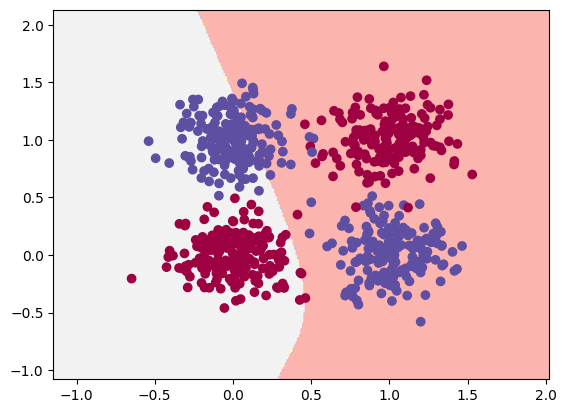

In [47]:
# MODEL 1 here
n0 = 2 # input layer dimensionality
n1 = 2 # hidden layer dimensionality
n2 = 2 # output layer dimensionality
alpha = 0.05 # learning rate for gradient descent
epochs = 100 # number of iteration/epochs

# Build a model with 3 layers
myModel1 = MyNeuralNet(n0, n1, n2, alpha)
myModel1.fit(X_train, y_train, epochs, X_val, y_val)
print("Accuracy on the test set is ", myModel1.evaluate(X_test, y_test))

# Plot the decision boundary
myModel1.plot_decision_boundary(X_train, y_train)


In [35]:
myModel1.predict(X_test)

array([1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1], dtype=int64)

Epoch 0/100 - loss: 6.786132 - accuracy: 0.506944 - val_loss: 4.677699 - val_accuracy: 0.462500
Epoch 10/100 - loss: 6.731263 - accuracy: 0.525000 - val_loss: 4.591694 - val_accuracy: 0.475000
Epoch 20/100 - loss: 6.683618 - accuracy: 0.559722 - val_loss: 4.507519 - val_accuracy: 0.537500
Epoch 30/100 - loss: 6.658188 - accuracy: 0.622222 - val_loss: 4.452822 - val_accuracy: 0.587500
Epoch 40/100 - loss: 6.655987 - accuracy: 0.662500 - val_loss: 4.430804 - val_accuracy: 0.687500
Epoch 50/100 - loss: 6.667425 - accuracy: 0.694444 - val_loss: 4.428799 - val_accuracy: 0.712500
Epoch 60/100 - loss: 6.681431 - accuracy: 0.718056 - val_loss: 4.433774 - val_accuracy: 0.750000
Epoch 70/100 - loss: 6.690982 - accuracy: 0.745833 - val_loss: 4.437971 - val_accuracy: 0.775000
Epoch 80/100 - loss: 6.694429 - accuracy: 0.756944 - val_loss: 4.439127 - val_accuracy: 0.787500
Epoch 90/100 - loss: 6.693164 - accuracy: 0.768056 - val_loss: 4.437803 - val_accuracy: 0.775000
Accuracy on the test set is  0.

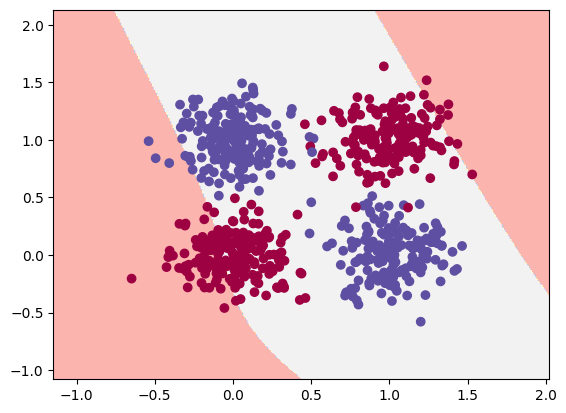

In [46]:
# MODEL 2 here
n0 = 2 # input layer dimensionality
n1 = 8 # hidden layer dimensionality
n2 = 2 # output layer dimensionality
alpha = 0.05 # learning rate for gradient descent
epochs = 100 # number of iteration/epochs

# Build a model with 3 layers
myModel2 = MyNeuralNet(n0, n1, n2, alpha)
myModel2.fit(X_train, y_train, epochs, X_val, y_val)
print("Accuracy on the test set is ", myModel2.evaluate(X_test, y_test))

# Plot the decision boundary
myModel2.plot_decision_boundary(X_train, y_train)

Epoch 0/100 - loss: 7.273502 - accuracy: 0.697222 - val_loss: 5.162748 - val_accuracy: 0.662500
Epoch 10/100 - loss: 7.184493 - accuracy: 0.630556 - val_loss: 5.076838 - val_accuracy: 0.637500
Epoch 20/100 - loss: 7.174103 - accuracy: 0.597222 - val_loss: 4.955317 - val_accuracy: 0.637500
Epoch 30/100 - loss: 7.128163 - accuracy: 0.590278 - val_loss: 4.786494 - val_accuracy: 0.662500
Epoch 40/100 - loss: 7.149883 - accuracy: 0.555556 - val_loss: 4.699304 - val_accuracy: 0.637500
Epoch 50/100 - loss: 7.206164 - accuracy: 0.481944 - val_loss: 4.688267 - val_accuracy: 0.600000
Epoch 60/100 - loss: 7.271574 - accuracy: 0.408333 - val_loss: 4.718578 - val_accuracy: 0.575000
Epoch 70/100 - loss: 7.335533 - accuracy: 0.412500 - val_loss: 4.768187 - val_accuracy: 0.550000
Epoch 80/100 - loss: 7.373238 - accuracy: 0.427778 - val_loss: 4.806826 - val_accuracy: 0.562500
Epoch 90/100 - loss: 7.378721 - accuracy: 0.431944 - val_loss: 4.823015 - val_accuracy: 0.562500
Accuracy on the test set is  0.

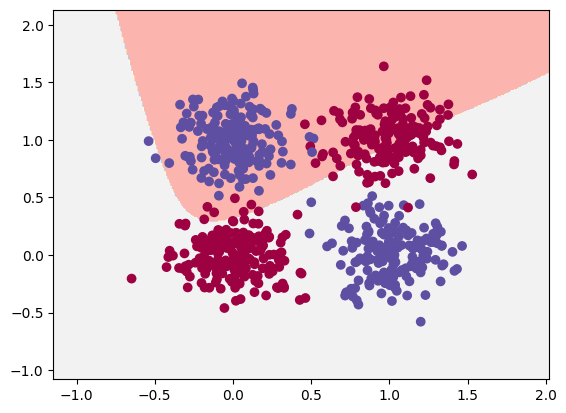

In [45]:
# MODEL 3 here
n0 = 2 # input layer dimensionality
n1 = 20 # hidden layer dimensionality
n2 = 2 # output layer dimensionality
alpha = 0.05 # learning rate for gradient descent
epochs = 100 # number of iteration/epochs

# Build a model with 3 layers
myModel3 = MyNeuralNet(n0, n1, n2, alpha)
myModel3.fit(X_train, y_train, epochs, X_val, y_val)
print("Accuracy on the test set is ", myModel3.evaluate(X_test, y_test))

# Plot the decision boundary
myModel3.plot_decision_boundary(X_train, y_train)

In [49]:
# COMPARISONS WITH THE STANDARD LIBRARY
std_model = build_model(optimizer="sgd")
std_model.fit(X_train, to_categorical(y_train), batch_size = 32, epochs=100, verbose = 0)


In [50]:
loss, accuracy = my_model.evaluate(X_test, to_categorical(y_test))
print("accuracy of test set:", accuracy)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9286 - loss: 0.4468
accuracy of test set: 0.9549999833106995


## Reflection
Write at least a paragraph answering these prompts: How did your own network perform? Is there any major differences between the implementations? Finally, reflecting on your experience implementing a learning algorithm for this assignment (Was it hard/easy/fun?, From which part did you learn the most?)!

My network did not perform as well as the standard library, but was almost comparable when I created a model with 8 nodes in the hidden layer and a learning rate of 0.05 (both 0.01 and 0.1 weren't performing well). My implementation only allowed for one optimizer, while the built in implementation had several. Of the ones I tested, the "adam" optimizer worked best for the built in models. This was a difficult assignment, but the hints helped a lot and the logic was not too bad. It took me a while to figure out some of the calculations because there was a small part of mine that was messed up and causing my model to predict almost every point as the same class.

---
# Get Help?
In case you get stuck in any step in the process, you may find some useful information from:

 * Consult my [lecture 13](https://docs.google.com/presentation/d/1otQfmMomWctLZKI3hHKAA4lLkbXFtagLaQov8gNh4LI/edit?usp=sharing) and [Colab Notebook 10](https://colab.research.google.com/drive/1x5biI3dP5YvvDEI0wapJcSgQNnATDzNe)
 * Talk to the TA, they are available and there to help you during office hour.
 * Come talk to me or email me <nn4pj@virginia.edu> with subject starting "CS4774 Assignment 4:...".

Part of the codes used in this assignment is modified from Konstantinos Kitsios under the 3-Clause BSD License. Best of luck and have fun!